In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('ds_task_ jeff.csv', index_col=0)

/tmp/ipykernel_8917/324311600.py:1: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ds_task_ jeff.csv', index_col=0)


In [3]:
df.head()

,lead_id,redirect_timestamp,lead_utm_source,lead_utm_medium,lead_utm_campaign,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,lead_referrer,lead_brand,...,a_in_30d,b_cr_to_different_partner,a_cr_to_different_partner,non_converted_to_partner,redirect_partner,converted_to_b,converted_to_a,conversion_revenue,expected_b_revenue,expected_a_revenue
redirect_id,,,,,,,,,,,,,,,,,,,,,
2279575,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 10:01:54,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,cef5813b9a4f14cc4f1b5e912f92e57021c30f2b321fa7...,...,0,NaN,NaN,0,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
2283922,147296aa1ecc1d740ee65c1e6cf7befd79c6d84d4d21bf...,2021-04-05 15:52:38,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,12.0,7.0,4.0,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,cef5813b9a4f14cc4f1b5e912f92e57021c30f2b321fa7...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0
2419471,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:35:40,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,...,0,0.0,0.0,0,fa9f3d2f22b22b9cacb176e9acc31a9c8e93cf2b5676d0...,0,0,0,NaN,80.0
2419675,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:45:34,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,...,0,0.0,0.0,1,d8eb2c7e1518a32ff1077264af8067d708354483a439ca...,0,0,0,50.0,NaN
2419694,2e20d165e842cf76cec03efec7b65a517a158f503da99e...,2021-04-13 09:46:04,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,10.0,5.0,5.0,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,...,0,0.0,0.0,0,f00f2889a9ebe18418c7ee6d04ac36611b59b837644624...,0,0,0,10.0,70.0


# EDA

In [4]:
df.shape

(314151, 214)

In [5]:
list(df.columns) #investigate columns of a dataset

['lead_id',
 'redirect_timestamp',
 'lead_utm_source',
 'lead_utm_medium',
 'lead_utm_campaign',
 'lead_hour_of_registration',
 'lead_weekday_of_registration',
 'lead_month_day_of_registration',
 'lead_referrer',
 'lead_brand',
 'lead_ip_country_code',
 'lead_ip_region_name',
 'lead_ip_city',
 'lead_ip_isp',
 'lead_ip_as_name',
 'lead_ip_is_hosting',
 'lead_ip_is_mobile',
 'lead_ip_is_proxy',
 'lead_ua_device_class',
 'lead_ua_device_name',
 'lead_ua_device_brand',
 'lead_ua_os_class',
 'lead_ua_os_name',
 'lead_ua_os_version',
 'lead_ua_os_version_name',
 'lead_ua_layout_engine_class',
 'lead_ua_layout_engine_version',
 'lead_ua_agent_class',
 'lead_ua_agent_name',
 'lead_ua_agent_version',
 'redirect_utm_source',
 'redirect_utm_medium',
 'redirect_utm_campaign',
 'redirect_hour',
 'redirect_weekday',
 'redirect_month_day',
 'redirect_referrer',
 'redirect_brand',
 'hours_since_registration',
 'ip_matches_lead',
 'ua_matches_lead',
 'redirect_ip_country_code',
 'lredirect_ip_region_na

In [6]:
feat_cols = ['lead_utm_source',
 'lead_utm_medium',
 'lead_utm_campaign',
 'lead_hour_of_registration',
 'lead_weekday_of_registration',
 'lead_month_day_of_registration',
 'lead_referrer',
 'lead_brand',
 'lead_ip_country_code',
 'lead_ip_region_name',
 'lead_ip_city',
 'lead_ip_isp',
 'lead_ip_as_name',
 'lead_ip_is_hosting',
 'lead_ip_is_mobile',
 'lead_ip_is_proxy',
 'lead_ua_device_class',
 'lead_ua_device_name',
 'lead_ua_device_brand',
 'lead_ua_os_class',
 'lead_ua_os_name',
 'lead_ua_os_version',
 'lead_ua_os_version_name',
 'lead_ua_layout_engine_class',
 'lead_ua_layout_engine_version',
 'lead_ua_agent_class',
 'lead_ua_agent_name',
 'lead_ua_agent_version',
 'redirect_utm_source',
 'redirect_utm_medium',
 'redirect_utm_campaign',
 'redirect_hour',
 'redirect_weekday',
 'redirect_month_day',
 'redirect_referrer',
 'redirect_brand',
 'hours_since_registration',
 'ip_matches_lead',
 'ua_matches_lead',
 'redirect_ip_country_code',
 'lredirect_ip_region_name',
 'redirect_ip_city',
 'redirect_ip_isp',
 'redirect_ip_as_name',
 'redirect_ip_is_hosting',
 'redirect_ip_is_mobile',
 'redirect_ip_is_proxy',
 'redirect_ua_device_class',
 'redirect_ua_device_name',
 'redirect_ua_device_brand',
 'redirect_ua_os_class',
 'redirect_ua_os_name',
 'redirect_ua_os_version',
 'redirect_ua_os_version_name',
 'redirect_ua_layout_engine_class',
 'redirect_ua_layout_engine_version',
 'redirect_ua_agent_class',
 'redirect_ua_agent_name',
 'redirect_ua_agent_version',
 'previous_redirect_count',
 'has_previous_redirect',
 'different_redirect_partners',
 'different_redirect_sources',
 'different_ips',
 'different_uas'] # chose columns that may be features for our model

In [7]:
len(feat_cols)

65

In [8]:
df[feat_cols].dtypes.value_counts() #investigate dtypes of the dataset

object     47
int64       8
float64     7
bool        3
Name: count, dtype: int64

In [9]:
df_bool = df[feat_cols].select_dtypes(include=['bool']).astype(int)
df_bool.head() #convert boolean values to numerical

,redirect_ip_is_hosting,redirect_ip_is_mobile,redirect_ip_is_proxy
redirect_id,,,
2279575,0,1,0
2283922,0,1,0
2419471,0,0,0
2419675,0,0,0
2419694,0,0,0


In [10]:
df_num = df[feat_cols].select_dtypes(include=[np.number])
print(df_num.shape)
df_num.head()

(314151, 15)


,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,redirect_hour,redirect_weekday,redirect_month_day,hours_since_registration,ip_matches_lead,ua_matches_lead,previous_redirect_count,has_previous_redirect,different_redirect_partners,different_redirect_sources,different_ips,different_uas
redirect_id,,,,,,,,,,,,,,,
2279575,12.0,7.0,4.0,10.0,1.0,5.0,21.242587,0,1,0,0,0,0,0,0
2283922,12.0,7.0,4.0,15.0,1.0,5.0,27.088106,0,1,1,1,1,1,1,1
2419471,10.0,5.0,5.0,9.0,2.0,13.0,935.132797,0,0,4,4,4,2,1,1
2419675,10.0,5.0,5.0,9.0,2.0,13.0,935.297885,0,0,5,5,5,2,2,2
2419694,10.0,5.0,5.0,9.0,2.0,13.0,935.306091,0,0,6,6,5,2,2,2


#### Investigate numerical columns

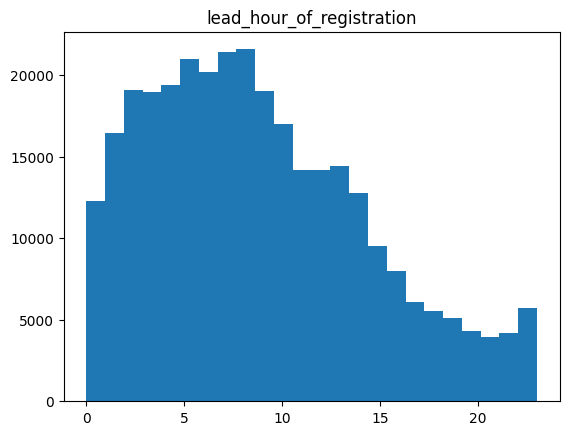

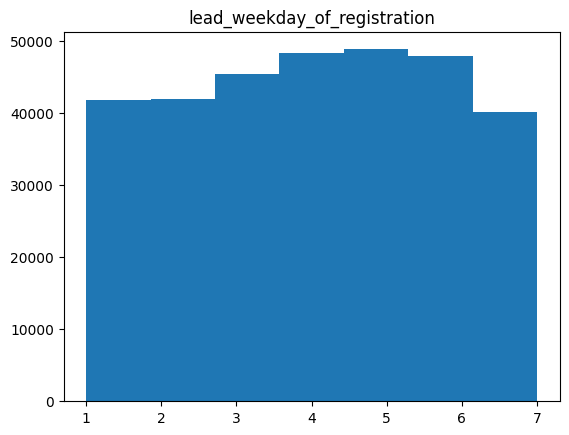

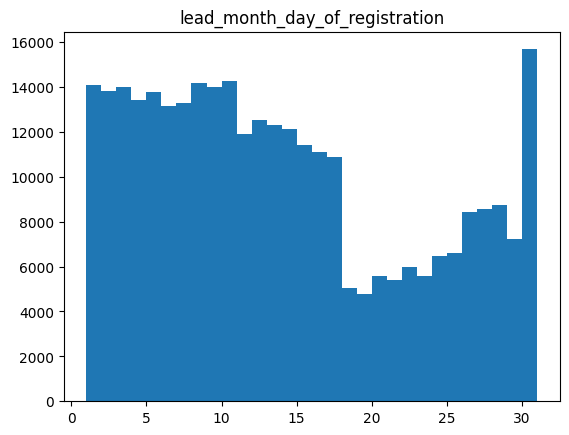

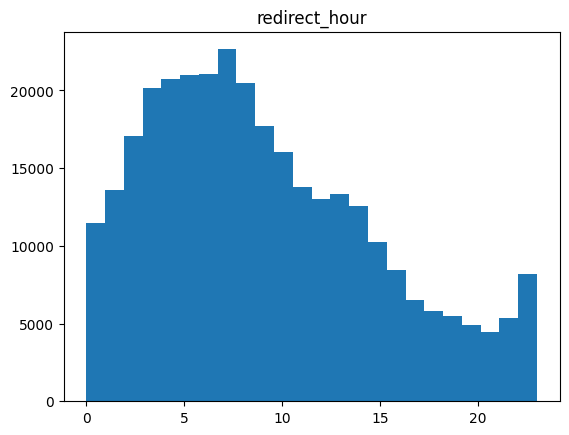

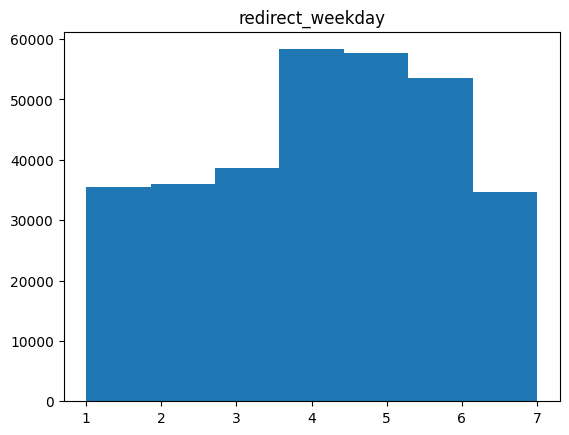

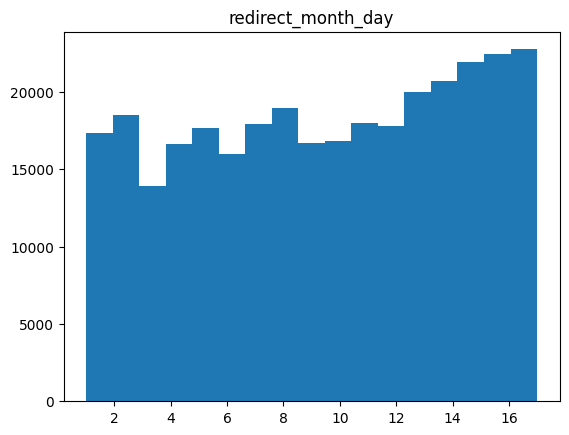

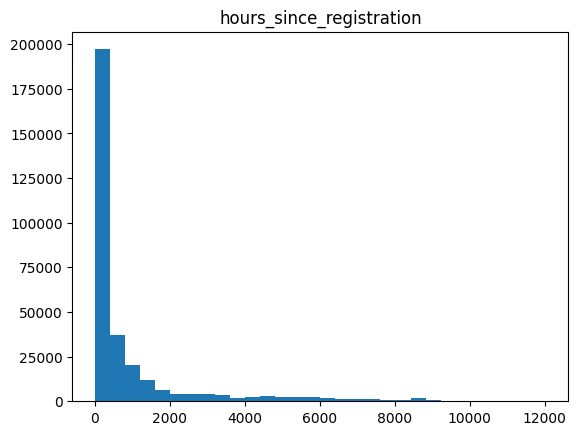

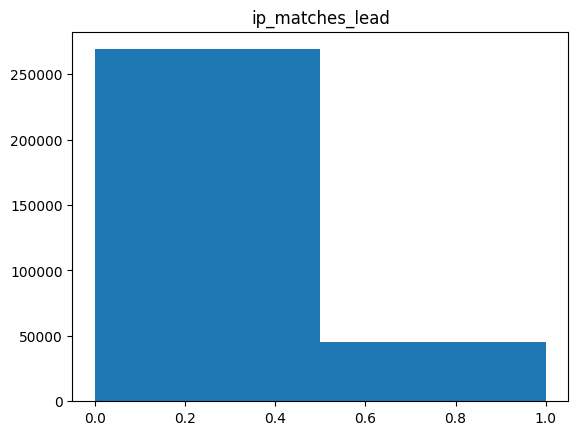

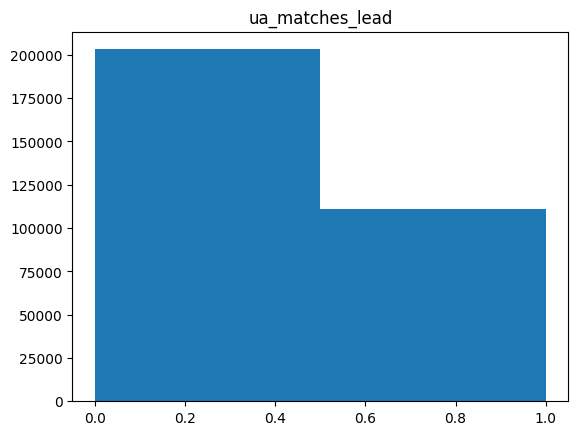

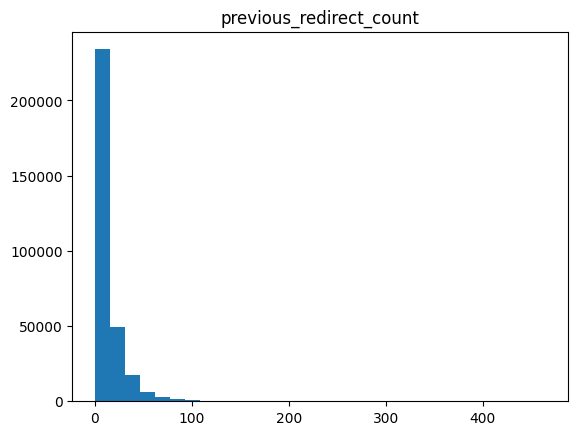

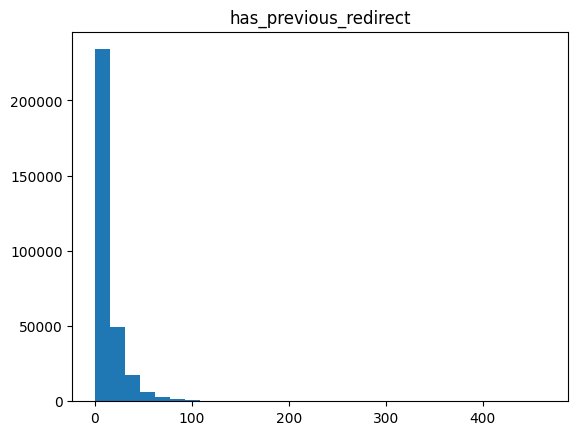

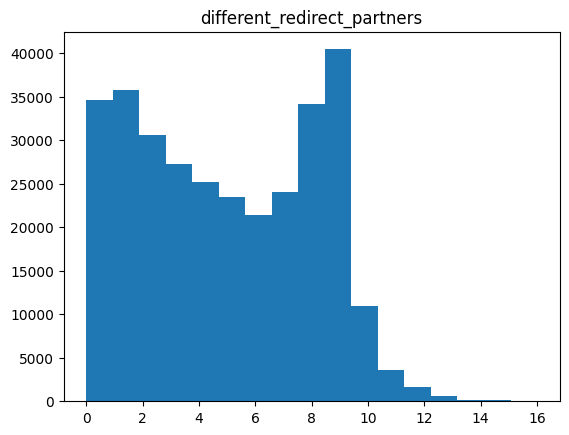

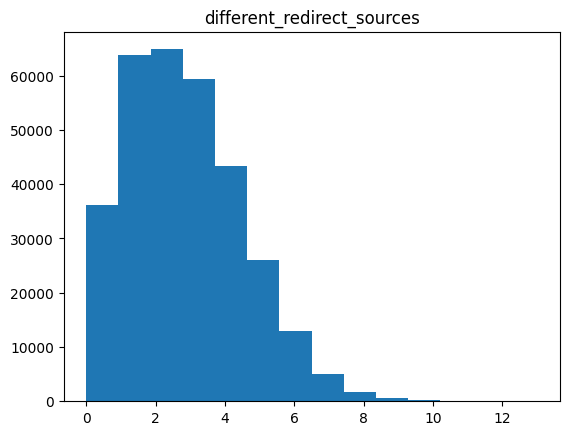

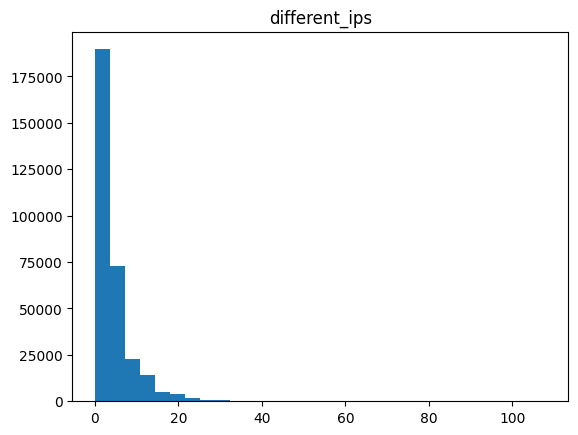

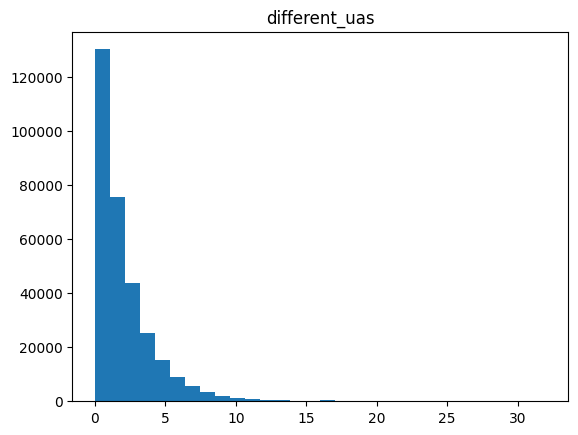

In [11]:
for i in df_num:
    plt.hist(df[i], bins=min(df[i].nunique(), 30))
    plt.title(i)
    plt.show()

## Some numerical columns have a very skewed distribution. Let's try to find a transformation, that converts the data to have a normal-like distribution. For some ML algorithms, it is essential, while for others it doesn't matter so much. So there is no harm in doing it.

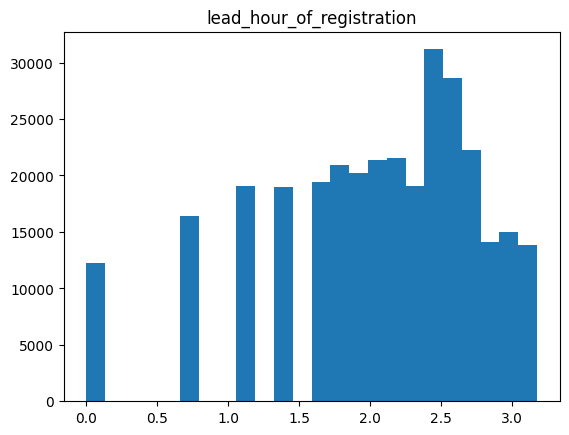

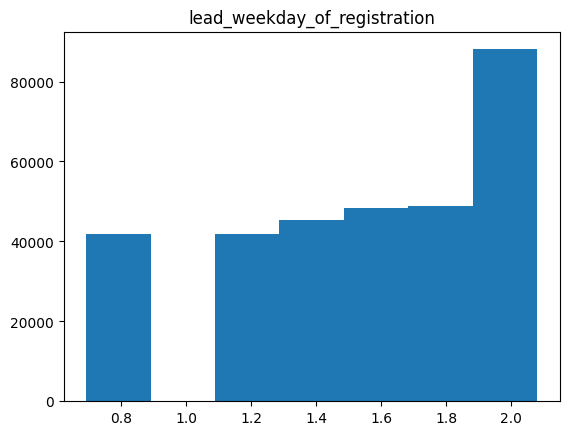

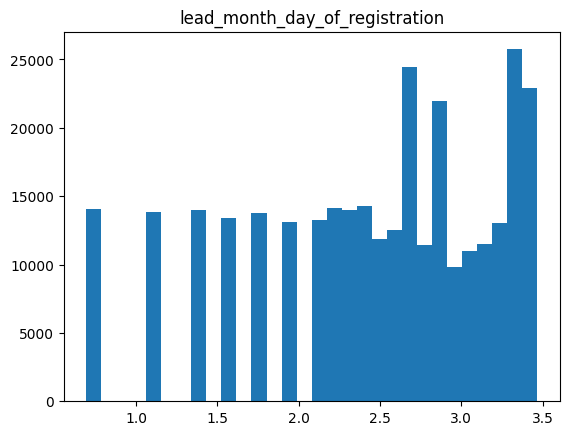

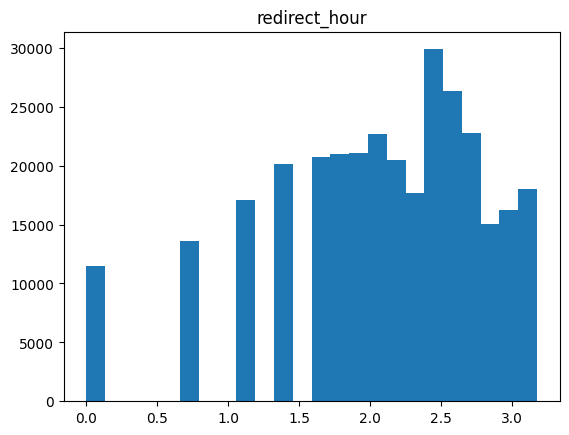

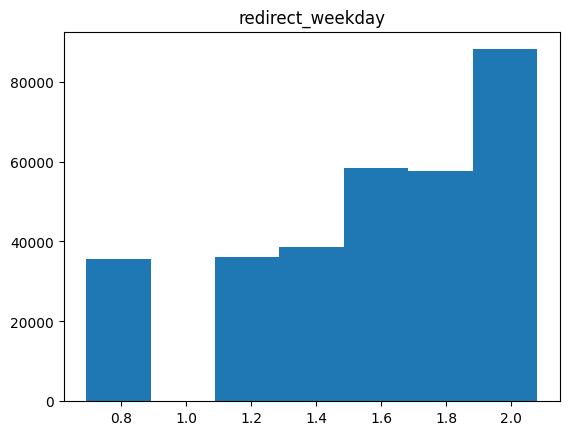

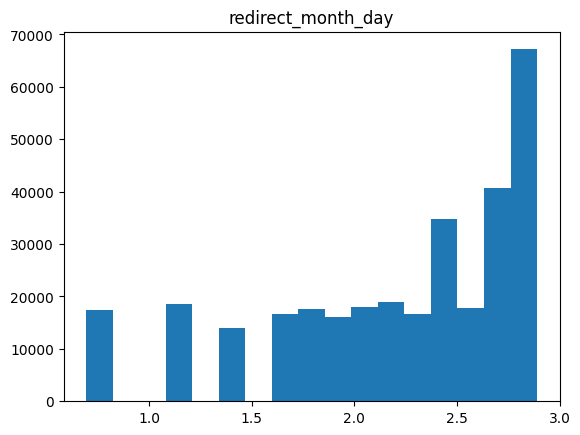

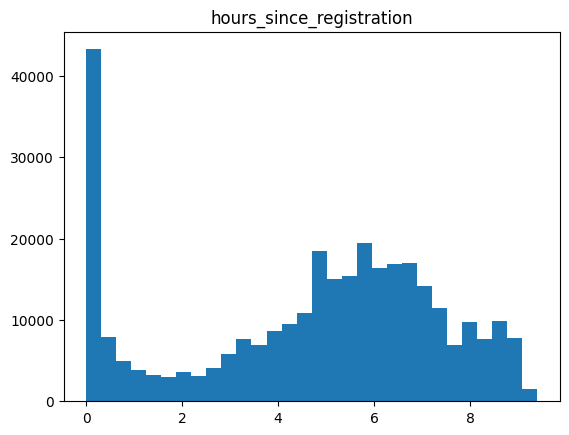

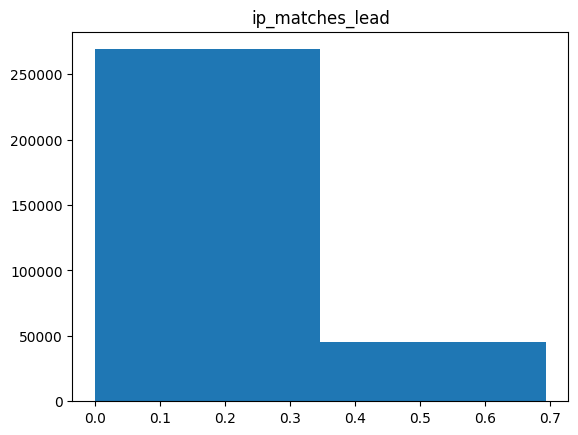

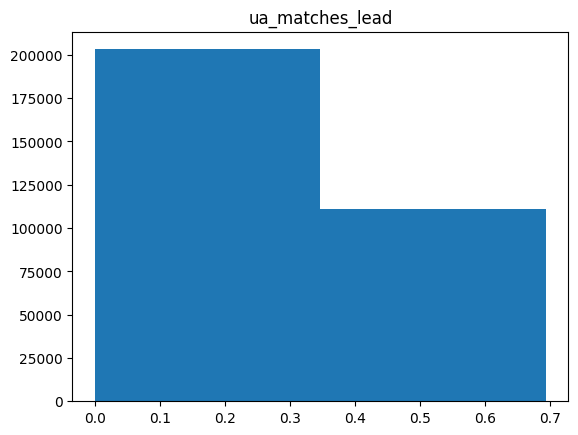

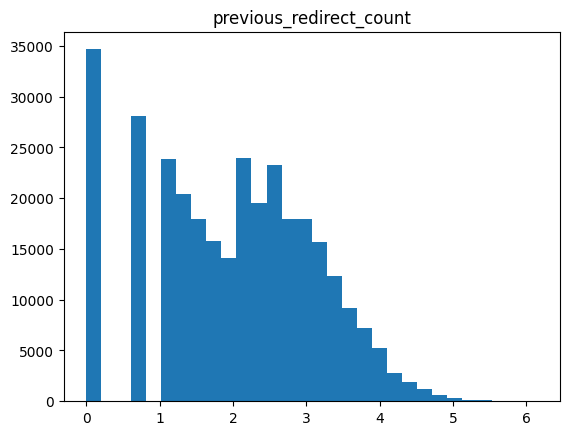

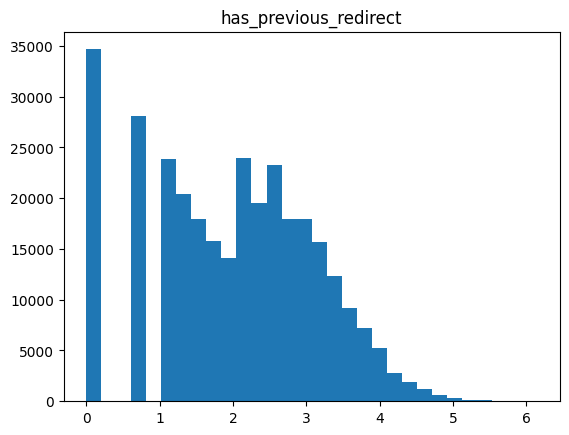

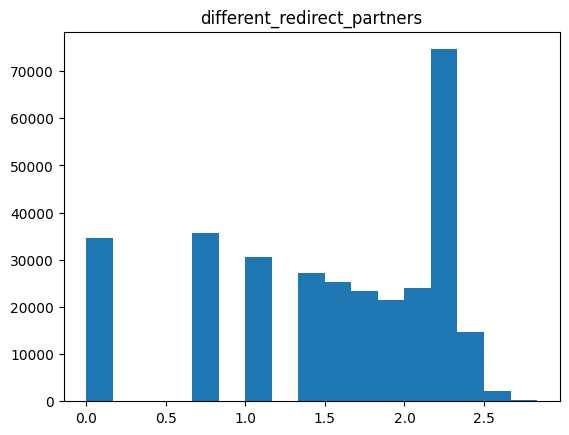

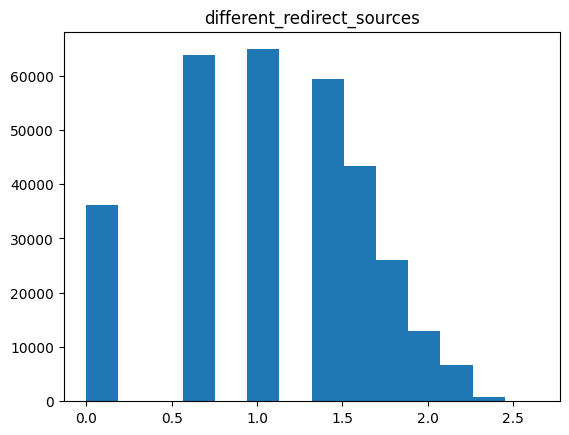

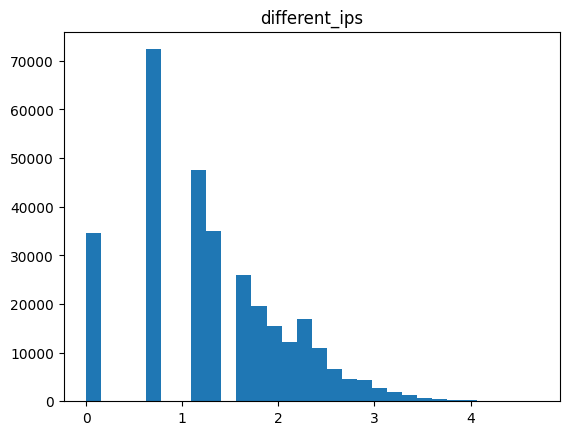

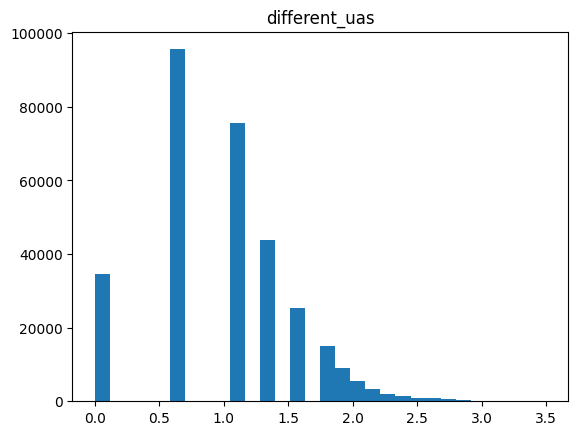

In [12]:
for i in df_num:
    plt.hist(np.log(df[i]+1), bins=min(df[i].nunique(), 30))
    plt.title(i)
    plt.show()

## It looks better, some features may need different transformation, but it's good for the begining

In [13]:
df_num_log = np.log(df_num+1)
df_num_log.head()

,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,redirect_hour,redirect_weekday,redirect_month_day,hours_since_registration,ip_matches_lead,ua_matches_lead,previous_redirect_count,has_previous_redirect,different_redirect_partners,different_redirect_sources,different_ips,different_uas
redirect_id,,,,,,,,,,,,,,,
2279575,2.564949,2.079442,1.609438,2.397895,0.693147,1.791759,3.102009,0.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2283922,2.564949,2.079442,1.609438,2.772589,0.693147,1.791759,3.335346,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
2419471,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841757,0.0,0.000000,1.609438,1.609438,1.609438,1.098612,0.693147,0.693147
2419675,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841934,0.0,0.000000,1.791759,1.791759,1.791759,1.098612,1.098612,1.098612
2419694,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841942,0.0,0.000000,1.945910,1.945910,1.791759,1.098612,1.098612,1.098612


In [14]:
df_cat = df[feat_cols].select_dtypes(include=['object'])
print(df_cat.shape)
df_cat.head()

(314151, 47)


,lead_utm_source,lead_utm_medium,lead_utm_campaign,lead_referrer,lead_brand,lead_ip_country_code,lead_ip_region_name,lead_ip_city,lead_ip_isp,lead_ip_as_name,...,redirect_ua_device_brand,redirect_ua_os_class,redirect_ua_os_name,redirect_ua_os_version,redirect_ua_os_version_name,redirect_ua_layout_engine_class,redirect_ua_layout_engine_version,redirect_ua_agent_class,redirect_ua_agent_name,redirect_ua_agent_version
redirect_id,,,,,,,,,,,,,,,,,,,,,
2279575,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,cef5813b9a4f14cc4f1b5e912f92e57021c30f2b321fa7...,576123d7a7d57a6b3bc169802313fa3026181fe8b86121...,381ec4b8406e52032d92d707416ca98eb6812916bd580f...,381ec4b8406e52032d92d707416ca98eb6812916bd580f...,23657271bb869a81f5e7db0b07172d11f0e6d3f9593fb4...,37b0e46f7bc283b1f4541876102a4d5e5901e8712e8bc3...,...,Apple,Mobile,iOS,13.3.1,iOS 13.3.1,Browser,605.1.15,Browser,Safari,13.0.5
2283922,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,d7564dc9d7dc4e08a7d59c90425b182638d3776252e81a...,0032185876273e288d2aae3d2e51fb7d3c1bbda279e3a0...,cef5813b9a4f14cc4f1b5e912f92e57021c30f2b321fa7...,576123d7a7d57a6b3bc169802313fa3026181fe8b86121...,381ec4b8406e52032d92d707416ca98eb6812916bd580f...,381ec4b8406e52032d92d707416ca98eb6812916bd580f...,23657271bb869a81f5e7db0b07172d11f0e6d3f9593fb4...,37b0e46f7bc283b1f4541876102a4d5e5901e8712e8bc3...,...,Apple,Mobile,iOS,13.3.1,iOS 13.3.1,Browser,605.1.15,Browser,Safari,13.0.5
2419471,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,576123d7a7d57a6b3bc169802313fa3026181fe8b86121...,1d8dac46ec70a1b9c97b82ff3ec8d0a08bf6c43b8383b7...,ca0623f59e01d6d09b50f10fb5c66105196fa4ad365119...,beaa9bb2469d15b05b77312cfae28aaca5b5bd591e97cd...,e9bd7f9492117ae2d937f7a1e3fef1474460f5181dad9b...,...,Apple,Mobile,iOS,14.4.2,iOS 14.4.2,Browser,605.1.15,Browser,Safari,14.0.3
2419675,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,576123d7a7d57a6b3bc169802313fa3026181fe8b86121...,1d8dac46ec70a1b9c97b82ff3ec8d0a08bf6c43b8383b7...,ca0623f59e01d6d09b50f10fb5c66105196fa4ad365119...,beaa9bb2469d15b05b77312cfae28aaca5b5bd591e97cd...,e9bd7f9492117ae2d937f7a1e3fef1474460f5181dad9b...,...,Apple,Mobile,iOS,14.4.2,iOS 14.4.2,Browser,605.1.15,Browser,Safari,14.0.3
2419694,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,4044691b05bcbabb633c8b0aadfc1e49659fd19e6be1c1...,248db24a5c41c07ad1e116ee114261e9037e9c2302a7ae...,a2c58c765557aed970b113f7d14fad92bab6cc5a6cc07c...,576123d7a7d57a6b3bc169802313fa3026181fe8b86121...,1d8dac46ec70a1b9c97b82ff3ec8d0a08bf6c43b8383b7...,ca0623f59e01d6d09b50f10fb5c66105196fa4ad365119...,beaa9bb2469d15b05b77312cfae28aaca5b5bd591e97cd...,e9bd7f9492117ae2d937f7a1e3fef1474460f5181dad9b...,...,Apple,Mobile,iOS,14.4.2,iOS 14.4.2,Browser,605.1.15,Browser,Safari,14.0.3


## Investigate categorical columns 

In [15]:
for i in df_cat.columns:
    print(df[i].value_counts(), '\n') 

lead_utm_source
4f03a060b7eb032972dcb327f2c989b14d5e73c35b3d5928a6f875ca39c159ba    135370
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     88781
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     63359
10c8055ed4d3edd3031a69b4d4ec4d3902667c7fb42144f29cbb33e3615561b0      9913
f5b9cce9fa228d57ddb870e5bde36e101343252c21ae43bdcfe0948694a795d9      3925
603d4240bfc904b4cf209364410442b52e9eddc667a0b448f9e3437927922198      1242
8f9ef37b49c14d549d6a7cc5094bec2ed46077c4cd3ee57fc0db3bb5ad98014d       850
58ba497c7290ea565fdbef3d701d1aaafc20b576d7886d4927311de20b25f526       371
7c12e92e03a413f75ddf5180d8a48e25abb0566205c1c1de69b39ec929f41d73        94
3e96141c21704e96af6257ea41c0fc690ce0504c8529dc424dc8b245b6343c0f        64
efce0becd006cac69bdcbcf37535b9bef3ea64001bc4cf05dd49faa76104d308        62
28e1198a8d39f5263f369e2f301e7dcd34975bd0a09805d651bd4edf75096f7e        58
6574460bbcefbb7e1e519b4abe36c6647c7d9d794be9eae18e6ccb013bfb1ef7        42
e99e74c2e

## There are many cathegorical columns with categories of low counts. If count is less then 5% it'll go to a category 'other'

In [16]:
len(df)*0.05 

15707.550000000001

In [17]:
DROP_RAT = 0.05
def convert_to_one_hot(ser, drop_rat=DROP_RAT):
    l = len(ser)
    ratio_ser = ser.value_counts()/l
    idx_for_other = ratio_ser[ratio_ser<drop_rat].index
    new_ser = ser.copy(deep=True)
    new_ser[new_ser.isin(idx_for_other)] = 'other'
    # print(len(new_ser.value_counts()))
    return pd.get_dummies(new_ser).astype(int)

In [18]:
df_col_dum = pd.DataFrame(index = df.index)
for col in df_cat.columns:
    new_dum = convert_to_one_hot(df[col])
    df_col_dum = pd.concat([df_col_dum, new_dum], axis=1)

In [19]:
df_col_dum.shape

(314151, 176)

In [20]:
df_for_ML = pd.concat([df_bool, df_num_log, df_col_dum], axis=1)
X = df_for_ML.to_numpy()
df_for_ML.head()

,redirect_ip_is_hosting,redirect_ip_is_mobile,redirect_ip_is_proxy,lead_hour_of_registration,lead_weekday_of_registration,lead_month_day_of_registration,redirect_hour,redirect_weekday,redirect_month_day,hours_since_registration,...,Safari,SamsungBrowser,UIWebView,other,12.1.2,13.2,14.0.3,605.1.15,89.0.4389.105,other
redirect_id,,,,,,,,,,,,,,,,,,,,,
2279575,0,1,0,2.564949,2.079442,1.609438,2.397895,0.693147,1.791759,3.102009,...,1,0,0,0,0,0,0,0,0,1
2283922,0,1,0,2.564949,2.079442,1.609438,2.772589,0.693147,1.791759,3.335346,...,1,0,0,0,0,0,0,0,0,1
2419471,0,0,0,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841757,...,1,0,0,0,0,0,1,0,0,0
2419675,0,0,0,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841934,...,1,0,0,0,0,0,1,0,0,0
2419694,0,0,0,2.397895,1.791759,1.791759,2.302585,1.098612,2.639057,6.841942,...,1,0,0,0,0,0,1,0,0,0


# Now, when I defined features let's work with target

## To simplify the task I replace value of postback and redirects to 1

In [21]:
list_postbacks = ['has_postback_from_1',
 'has_postback_from_2',
 'has_postback_from_3',
 'has_postback_from_4',
 'has_postback_from_5',
 'has_postback_from_6',
 'has_postback_from_7',
 'has_postback_from_8',
 'has_postback_from_atm_9',
 'has_postback_from_10',
 'has_postback_from_11',
 'has_postback_from_12',
 'has_postback_from_13',
 'has_postback_from_14',
 'has_postback_from_15',
 'has_postback_from_16',
 'has_postback_from_17',
 'has_postback_from_18']
df_postback = (df[list_postbacks]!=0).astype(int)
df_postback.head()

,has_postback_from_1,has_postback_from_2,has_postback_from_3,has_postback_from_4,has_postback_from_5,has_postback_from_6,has_postback_from_7,has_postback_from_8,has_postback_from_atm_9,has_postback_from_10,has_postback_from_11,has_postback_from_12,has_postback_from_13,has_postback_from_14,has_postback_from_15,has_postback_from_16,has_postback_from_17,has_postback_from_18
redirect_id,,,,,,,,,,,,,,,,,,
2279575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2283922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2419471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2419675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2419694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
list_redirects = ['redirects_to_1',
 'redirects_to_2',
 'redirects_to_3',
 'redirects_to_4',
 'redirects_to_5',
 'redirects_to_6',
 'redirects_to_7',
 'redirects_to_8',
 'redirects_to_atm_9',
 'redirects_to_10',
 'redirects_to_11',
 'redirects_to_12',
 'redirects_to_13',
 'redirects_to_14',
 'redirects_to_15',
 'redirects_to_16',
 'redirects_to_on_17',
 'redirects_to_18']

df_redirect = (df[list_redirects]!=0).astype(int)
df_redirect.head()

,redirects_to_1,redirects_to_2,redirects_to_3,redirects_to_4,redirects_to_5,redirects_to_6,redirects_to_7,redirects_to_8,redirects_to_atm_9,redirects_to_10,redirects_to_11,redirects_to_12,redirects_to_13,redirects_to_14,redirects_to_15,redirects_to_16,redirects_to_on_17,redirects_to_18
redirect_id,,,,,,,,,,,,,,,,,,
2279575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2283922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2419471,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2419675,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2419694,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


#### If a lead had redirect to a partner but didn't recieve a postback, I consider it a rejection. I encode lead-partner rejection  as -1, and lead-partner convergence as 1

In [23]:
df_target = df_postback.copy()
df_target[((df_redirect==1).to_numpy() & (df_postback==0))]=-1

In [24]:
(df_target==1).sum().sort_values() #number of postbacks for each partner

has_postback_from_7            0
has_postback_from_10          48
has_postback_from_6           51
has_postback_from_1          104
has_postback_from_5          202
has_postback_from_12         221
has_postback_from_11         450
has_postback_from_4         1578
has_postback_from_18        4137
has_postback_from_17        5429
has_postback_from_8         8654
has_postback_from_2        20753
has_postback_from_atm_9    27789
has_postback_from_14       28966
has_postback_from_13       29014
has_postback_from_15       31047
has_postback_from_16       31697
has_postback_from_3        60385
dtype: int64

In [25]:
df_target.pop('has_postback_from_7') # no records

redirect_id
2279575    0
2283922    0
2419471    0
2419675    0
2419694    0
          ..
2265503    0
2351713    0
2464124    0
2333026    0
2382079    0
Name: has_postback_from_7, Length: 314151, dtype: int64

## Each partner has their own acceptance rate, it bring us to most obvious choice of model - Bayesian

In [26]:
(df_target==1).sum()/((df_target==-1).sum()+(df_target==1).sum())

has_postback_from_1        0.052765
has_postback_from_2        0.118819
has_postback_from_3        0.278882
has_postback_from_4        0.141817
has_postback_from_5        0.016059
has_postback_from_6        0.010268
has_postback_from_8        0.087313
has_postback_from_atm_9    0.213191
has_postback_from_10       0.011852
has_postback_from_11       0.231720
has_postback_from_12       0.269512
has_postback_from_13       0.200403
has_postback_from_14       0.144926
has_postback_from_15       0.229287
has_postback_from_16       0.149234
has_postback_from_17       0.036923
has_postback_from_18       0.270251
dtype: float64

## To demonstrate the idea of construction of target variable, I show it on three samples

In [27]:
samp_for_dem = [2376957, 2381117, 2504644]

In [28]:
df.loc[samp_for_dem, list_redirects]

,redirects_to_1,redirects_to_2,redirects_to_3,redirects_to_4,redirects_to_5,redirects_to_6,redirects_to_7,redirects_to_8,redirects_to_atm_9,redirects_to_10,redirects_to_11,redirects_to_12,redirects_to_13,redirects_to_14,redirects_to_15,redirects_to_16,redirects_to_on_17,redirects_to_18
redirect_id,,,,,,,,,,,,,,,,,,
2376957,1,1,4,1,1,2,0,0,2,0,0,0,6,1,3,4,1,5
2381117,1,0,3,3,1,0,0,0,3,0,0,0,2,0,2,1,3,0
2504644,2,0,3,4,5,2,0,0,2,0,0,0,2,1,2,2,0,5


In [29]:
df.loc[samp_for_dem, list_postbacks]

,has_postback_from_1,has_postback_from_2,has_postback_from_3,has_postback_from_4,has_postback_from_5,has_postback_from_6,has_postback_from_7,has_postback_from_8,has_postback_from_atm_9,has_postback_from_10,has_postback_from_11,has_postback_from_12,has_postback_from_13,has_postback_from_14,has_postback_from_15,has_postback_from_16,has_postback_from_17,has_postback_from_18
redirect_id,,,,,,,,,,,,,,,,,,
2376957,2,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0
2381117,2,0,0,2,0,0,0,0,1,0,0,0,3,0,0,0,0,0
2504644,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [30]:
df_target.loc[samp_for_dem]

,has_postback_from_1,has_postback_from_2,has_postback_from_3,has_postback_from_4,has_postback_from_5,has_postback_from_6,has_postback_from_8,has_postback_from_atm_9,has_postback_from_10,has_postback_from_11,has_postback_from_12,has_postback_from_13,has_postback_from_14,has_postback_from_15,has_postback_from_16,has_postback_from_17,has_postback_from_18
redirect_id,,,,,,,,,,,,,,,,,
2376957,1,-1,-1,-1,-1,-1,0,-1,0,0,0,1,-1,1,-1,-1,-1
2381117,1,0,-1,1,-1,0,0,1,0,0,0,1,0,-1,-1,-1,0
2504644,-1,0,-1,-1,-1,-1,0,-1,0,0,0,-1,1,-1,-1,0,-1


In [31]:
y = df_target.to_numpy()
(y==0).all(1).sum()

34655

In [32]:
X = X[~(y==0).all(1)]
y = y[~(y==0).all(1)]

## Separate train and test set. Since the samples are ordered by time, we take test set from the end

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
import pickle
pickle.dump((X_train, X_test, y_train, y_test), open('data', 'wb'))